# Employee Turnover

### Author: Collins Ikiara  
### Date: September, 2024

<hr style="border:1px solid black">

## About the Dataset

### Context

This database is from a large US company (no name given for privacy reasons). The management department is worried about the relatively high turnover. They want to find ways to reduce the number of employees leaving the company and to better understand the situation, which employees are more likely to leave, and why.

### The data

The HR department has assembled data on **almost 10,000 employees** who left the company between **2016-2020**. They used information from exit interviews, performance reviews, and employee records.

- **department**: the department the employee belongs to. *(categorical)*
- **promoted**: 1 if the employee was promoted in the previous 24 months, 0 otherwise. *(integer)*
- **review**: the composite score the employee received in their last evaluation. *(decimal/float)*
- **projects**: how many projects the employee is involved in. *(integer)*
- **salary**: for confidentiality reasons, salary comes in three tiers: low, medium, high. *(categorical)*
- **tenure**: how many years the employee has been at the company. *(decimal/float)*
- **satisfaction**: a measure of employee satisfaction from surveys. *(decimal/float)*
- **bonus**: 1 if the employee received a bonus in the previous 24 months, 0 otherwise. *(integer)*
- **avg_hrs_month**: the average hours the employee worked in a month. *(decimal/float)*
- **left**: "yes" if the employee ended up leaving, "no" otherwise. *(categorical)*

### Objective

1. Build a predictive model that can classify whether an employee will leave the company based on various factors such as **department**, **satisfaction**, **salary**, **tenure**, and other features.
2. Create a function that allows manual input of employee details (such as **department**, **salary**, **performance review**, and **average hours worked per month**) and outputs a prediction of whether the employee is likely to leave the company or not. The prediction will be presented as either 'yes' (the employee will leave) or 'no' (the employee will stay), enabling real-time, scenario-based employee turnover predictions.
columns.


<hr style="border:1px solid black">

## Step 1: Data Understanding and Exploration

### 1.1 Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### 1.2. Load the Dataset

**Explanation:**
We start by loading the dataset. This step is crucial to bring the data into our working environment for further processing and analysis.

In [2]:
# Load the dataset
df = pd.read_csv('employee_churn_data.csv')

# Display the first few rows of the dataset
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


### 1.3. Initial Data Inspection

**Explanation:**
Inspect the dataset to understand its structure, data types, and identify any missing values. This helps in planning the data cleaning process.

In [3]:
# Check the structure of the dataset, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [4]:
# Summarize missing values
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [5]:
# Check basic statistics for numerical columns
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


<hr style="border:1px solid black">

## Step 2: Exploratory Data Analysis (EDA)

### 2.1. Check for Duplicates

**Explanation:**
Check for any duplicate rows and remove them if necessary to ensure data integrity.

In [6]:
# Check for duplicates
df.duplicated().sum()

0

### 2.2. Analyze Categorical Features

**Explanation:**
Analyze the distribution of categorical variables (like department, salary, etc.) to understand their breakdown.

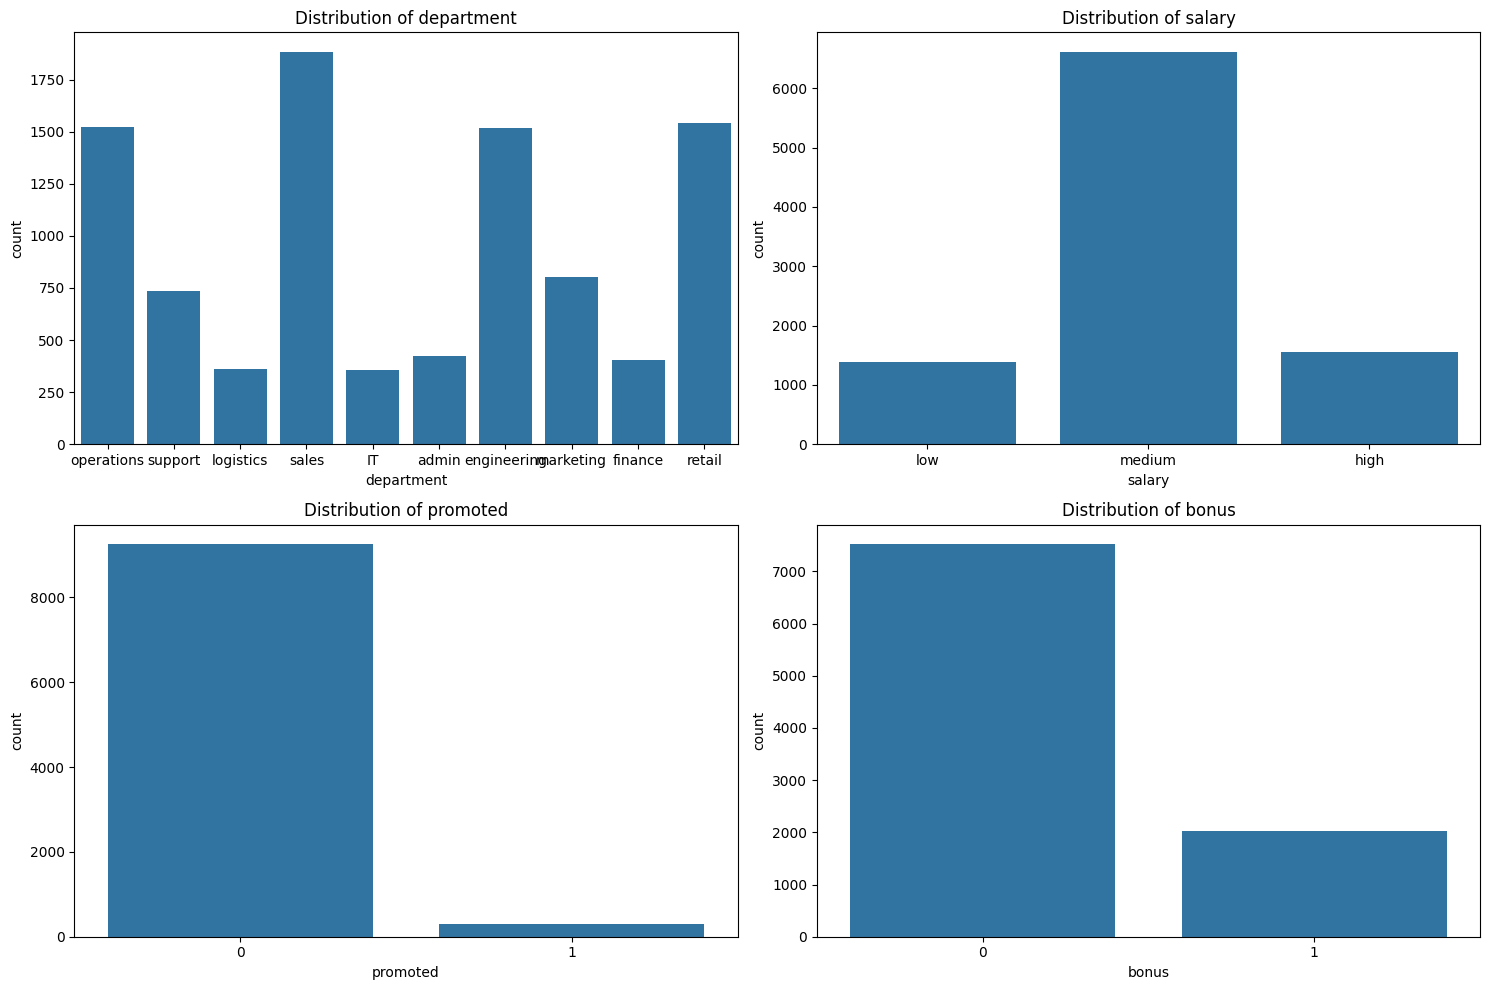

In [7]:
# Plot count plots for categorical columns
categorical_columns = ['department', 'salary', 'promoted', 'bonus']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

### 2.3. Distribution of Numerical Columns

**Explanation:**
Before proceeding with outlier detection, we need to analyze the distribution of the numerical features in your dataset. The distribution will help determine whether to use the **IQR**, **Z-Score**, **Modified Z-Score**, or more advanced methods like **Isolation Forest**.

After running the code and visualizing the distributions:
- If the distribution is approximately normal, use **Z-Score**.
- If the distribution is skewed, opt for **Modified Z-Score**.
- If you notice complex interactions between variables, **Isolation Forest** might be necessary.

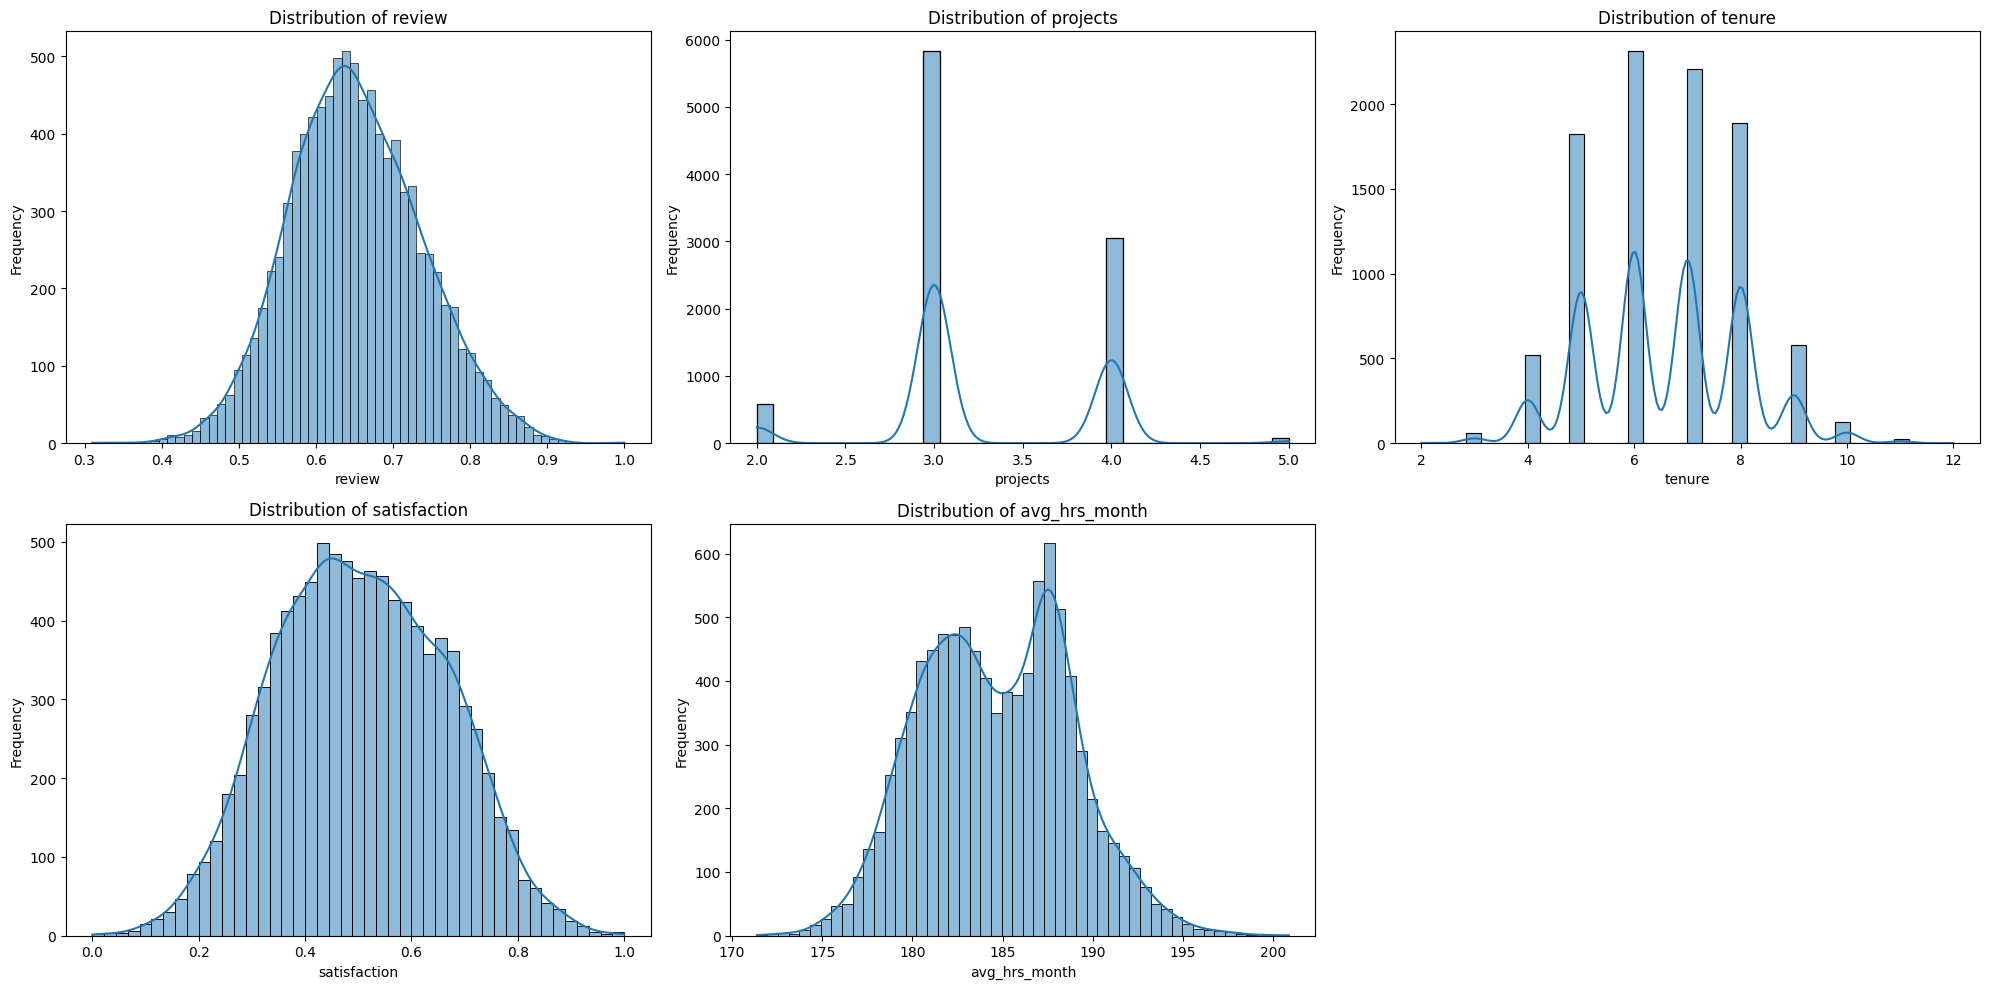

In [8]:
# Step: Analyzing the distribution of numerical columns

# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns from your dataset
numerical_columns = ['review', 'projects', 'tenure', 'satisfaction', 'avg_hrs_month']

# Set up the plot grid (1 row, 5 columns for the 5 numerical variables)
plt.figure(figsize=(20, 10))

# Plot the distribution of each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Create a subplot
    sns.histplot(df[column], kde=True)  # Plot histogram with KDE (Kernel Density Estimate) for smoother curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

### Findings from the Distribution Plots:

#### **Review Distribution:**
- The distribution of **review** scores appears to be **approximately normal**, with most values concentrated around the mean.
- There are a few data points on either end, but no extreme skewness is visible.
- **Suggested approach**: Since the distribution is close to normal, the **Z-Score method** would be appropriate for detecting outliers in this column.

#### **Projects Distribution:**
- The **projects** column shows a **bimodal distribution** (two peaks). This suggests that employees fall into two distinct groups based on the number of projects.
- The distinct peaks and gaps between the project counts could indicate potential outliers, but the **IQR method** might be more suitable due to the categorical-like nature of this variable (employees tend to work on a fixed number of projects).
- **Suggested approach**: Use the **IQR method** to detect outliers.

#### **Tenure Distribution:**
- The **tenure** distribution has several distinct spikes, suggesting a **discrete distribution** where employees tend to leave or stay after a specific number of years.
- The data appears to have multiple modes, indicating periods after which employees are more likely to leave.
- **Suggested approach**: The **IQR method** could be effective for detecting outliers in this case due to the discrete nature of the values.

#### **Satisfaction Distribution:**
- The distribution of **satisfaction** scores is **approximately normal**, with a slight left skew, indicating a few employees have low satisfaction scores.
- **Suggested approach**: Due to the near-normal distribution, the **Z-Score method** would be appropriate to detect outliers in this column.

#### **Average Hours per Month Distribution:**
- The distribution for **avg_hrs_month** shows a **multi-modal** pattern with peaks around certain ranges, likely representing different working patterns or job roles.
- Given the somewhat complex nature of this distribution, a method that handles multi-modal data like **Isolation Forest** may work well for detecting outliers.
- **Suggested approach**: Use **Isolation Forest** to detect outliers.

### 2.4. Outlier Detection

**Explanation:**
Z-Score Method for **review** and **satisfaction**:

In [9]:
from scipy import stats

# Z-Score method to detect outliers in review and satisfaction
z_threshold = 3  # Typically 3 is used for detecting outliers

# Apply Z-score and detect outliers
df['review_zscore'] = stats.zscore(df['review'])
df['satisfaction_zscore'] = stats.zscore(df['satisfaction'])

# Identify outliers where Z-score is greater than the threshold
review_outliers = df[df['review_zscore'].abs() > z_threshold]
satisfaction_outliers = df[df['satisfaction_zscore'].abs() > z_threshold]

# Display outliers in their own DataFrames using Pandas
review_outliers_df = review_outliers[['review', 'review_zscore']]
satisfaction_outliers_df = satisfaction_outliers[['satisfaction', 'satisfaction_zscore']]

# Indicate the number of outliers in each
review_outlier_count = review_outliers_df.shape[0]
satisfaction_outlier_count = satisfaction_outliers_df.shape[0]

# Display the DataFrame for Review Outliers and the number of outliers
display(review_outliers_df)
print(f"Number of Review Outliers: {review_outlier_count}")

# Display the DataFrame for Satisfaction Outliers and the number of outliers
display(satisfaction_outliers_df)
print(f"Number of Satisfaction Outliers: {satisfaction_outlier_count}")

,review,review_zscore
3436,0.920712,3.152148
3551,0.918985,3.131903
3850,0.994363,4.015564
3930,0.917329,3.112486
4192,0.909189,3.017072
4318,0.924181,3.192816
4504,0.913349,3.065829
4991,0.389767,-3.072121
6196,1.000000,4.081644
7547,0.351682,-3.518600


Number of Review Outliers: 15


,satisfaction,satisfaction_zscore
128,0.991907,3.073303
878,0.982158,3.011816
1669,0.985067,3.030160
1755,1.000000,3.124348
5521,0.000000,-3.182936
6661,0.027934,-3.006746
7108,0.010476,-3.116860
8282,0.980994,3.004469


Number of Satisfaction Outliers: 8


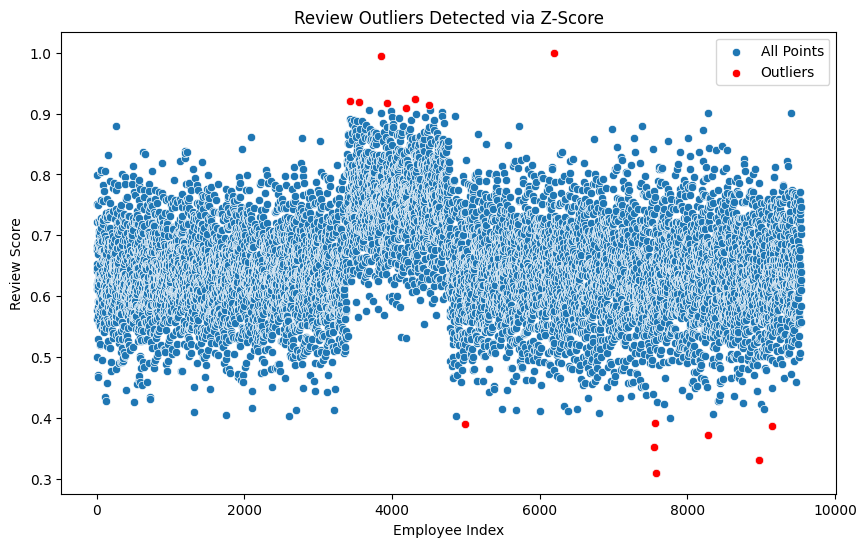

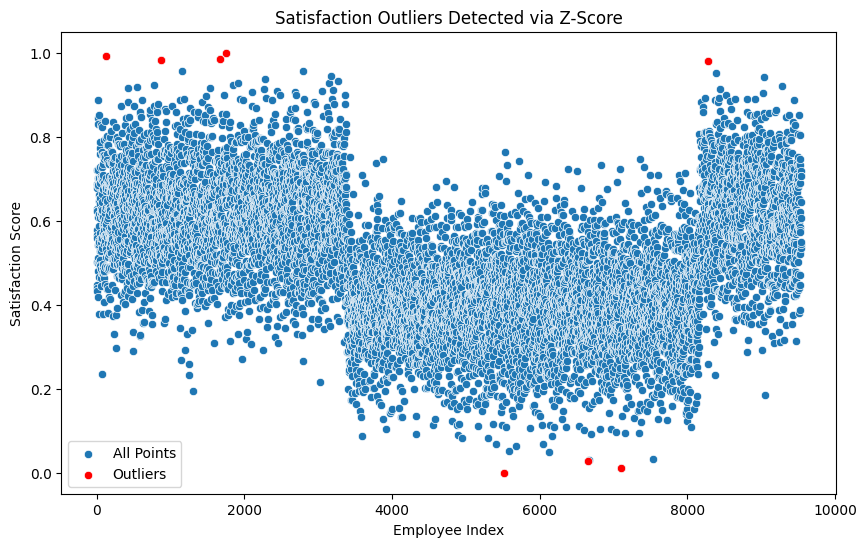

In [10]:
# Z-Score method - Scatterplot visualization for review and satisfaction outliers

# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot for Review Outliers
plt.figure(figsize=(10, 6))

# Plot all review points
sns.scatterplot(x=df.index, y=df['review'], label='All Points')

# Highlight review outliers
sns.scatterplot(x=review_outliers.index, y=review_outliers['review'], color='red', label='Outliers', marker='o')

plt.title('Review Outliers Detected via Z-Score')
plt.ylabel('Review Score')
plt.xlabel('Employee Index')

plt.legend()
plt.show()

# Scatterplot for Satisfaction Outliers
plt.figure(figsize=(10, 6))

# Plot all satisfaction points
sns.scatterplot(x=df.index, y=df['satisfaction'], label='All Points')

# Highlight satisfaction outliers
sns.scatterplot(x=satisfaction_outliers.index, y=satisfaction_outliers['satisfaction'], color='red', label='Outliers', marker='o')

plt.title('Satisfaction Outliers Detected via Z-Score')
plt.ylabel('Satisfaction Score')
plt.xlabel('Employee Index')

plt.legend()
plt.show()

<hr style="border:0.5px solid black">


**Explanation:**
IQR Method for **projects** and **tenure**:

In [11]:
# IQR method for detecting outliers in a DataFrame

def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for projects and tenure
projects_outliers = detect_outliers_iqr('projects')
tenure_outliers = detect_outliers_iqr('tenure')

# Store outliers for projects and tenure in Pandas DataFrames
projects_outliers_df = projects_outliers[['projects']]
tenure_outliers_df = tenure_outliers[['tenure']]

# Calculate the number of outliers for each
projects_outlier_count = projects_outliers_df.shape[0]
tenure_outlier_count = tenure_outliers_df.shape[0]

# Display the DataFrame for Projects Outliers and the number of outliers
display(projects_outliers_df)
print(f"Number of Projects Outliers: {projects_outlier_count}")

# Display the DataFrame for Tenure Outliers and the number of outliers
display(tenure_outliers_df)
print(f"Number of Tenure Outliers: {tenure_outlier_count}")

,projects


Number of Projects Outliers: 0


,tenure


Number of Tenure Outliers: 0


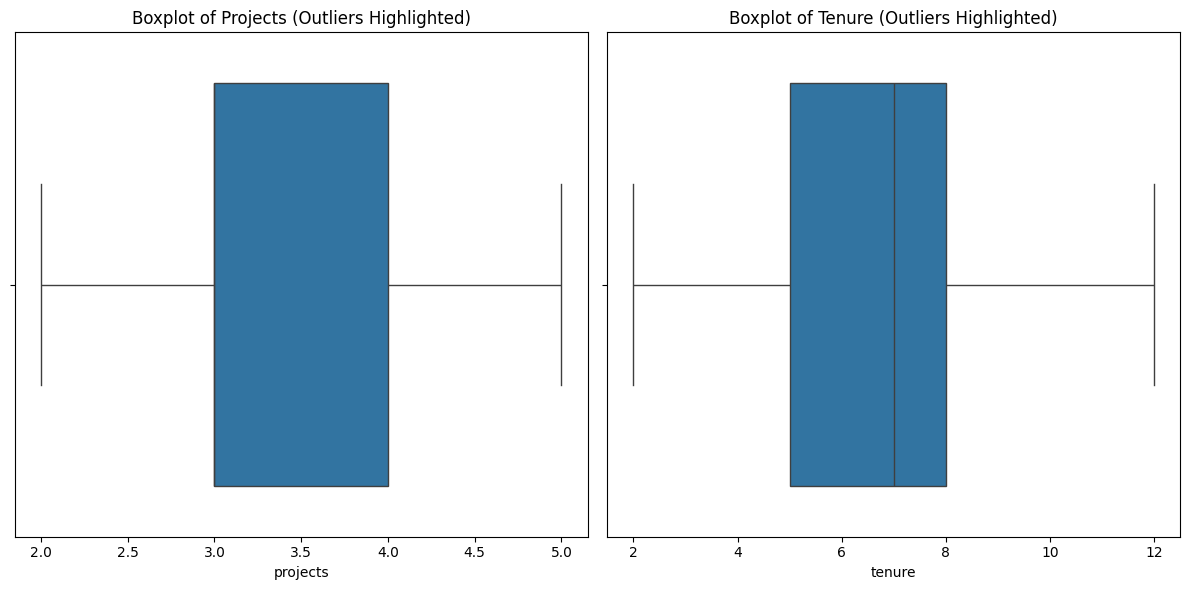

In [12]:
# IQR method - Boxplot visualization using Seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot to visualize boxplots for projects and tenure outliers
plt.figure(figsize=(12, 6))

# Boxplot for Projects
plt.subplot(1, 2, 1)
sns.boxplot(x=df['projects'])
plt.title('Boxplot of Projects (Outliers Highlighted)')

# Boxplot for Tenure
plt.subplot(1, 2, 2)
sns.boxplot(x=df['tenure'])
plt.title('Boxplot of Tenure (Outliers Highlighted)')

# Display the plots
plt.tight_layout()
plt.show()

<hr style="border:0.5px solid black">


**Explanation:**
Isolation Forest for **avg_hrs_month**:

In [13]:
from sklearn.ensemble import IsolationForest

# Isolation Forest for detecting outliers in avg_hrs_month
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier_score'] = iso_forest.fit_predict(df[['avg_hrs_month']])

# -1 indicates an outlier
avg_hrs_outliers = df[df['outlier_score'] == -1]

# Store the outliers in a Pandas DataFrame
avg_hrs_outliers_df = avg_hrs_outliers[['avg_hrs_month', 'outlier_score']]

# Calculate the number of outliers
avg_hrs_outlier_count = avg_hrs_outliers_df.shape[0]

# Display the DataFrame for Average Hours per Month Outliers and the number of outliers
display(avg_hrs_outliers_df)
print(f"Number of Average Hours per Month Outliers: {avg_hrs_outlier_count}")

,avg_hrs_month,outlier_score
27,176.151675,-1
40,176.312908,-1
41,176.458097,-1
62,176.737706,-1
114,175.680149,-1
...,...,...
8089,194.414396,-1
8135,197.698552,-1
8150,194.643499,-1
8152,192.969223,-1


Number of Average Hours per Month Outliers: 471


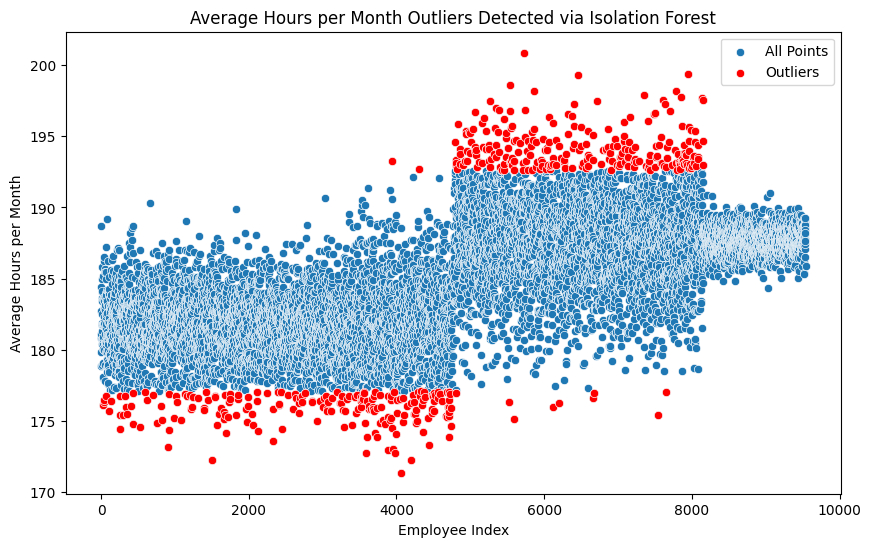

In [14]:
# Isolation Forest method - Scatterplot visualization for avg_hrs_month outliers

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of average hours worked per month, highlighting outliers
plt.figure(figsize=(10, 6))

# Plot all avg_hrs_month points
sns.scatterplot(x=df.index, y=df['avg_hrs_month'], label='All Points')

# Highlight outliers
sns.scatterplot(x=avg_hrs_outliers.index, y=avg_hrs_outliers['avg_hrs_month'], color='red', label='Outliers', marker='o')

plt.title('Average Hours per Month Outliers Detected via Isolation Forest')
plt.ylabel('Average Hours per Month')
plt.xlabel('Employee Index')

plt.legend()
plt.show()

<hr style="border:0.5px solid black">


### Why I Should Retain Outliers in My Employee Turnover Analysis

#### Capture the full range of employee behaviors:
- Outliers likely represent meaningful variations (e.g., extreme work hours, low satisfaction) that are critical for understanding diverse employee experiences.

#### Outliers provide insights into critical groups:
- Employees exhibiting extreme behaviors may be at high risk of turnover, and retaining these data points helps in identifying and addressing potential issues.

#### Removing outliers risks losing important decision-making data:
- Outliers are often edge cases that offer valuable insights for interventions, such as employees with low tenure or dissatisfaction that require focused attention.

#### Robust models can handle outliers:
- Algorithms like Random Forest and Gradient Boosting are resilient to outliers, allowing me to keep extreme values without degrading model performance.

#### Outliers can reveal hidden patterns:
- Retaining outliers enables the discovery of unique relationships, such as reasons for turnover among employees with very short or long tenures, leading to better retention strategies.

### Conclusion:
- Retaining outliers allows for a deeper and more comprehensive analysis of employee turnover, ensuring that critical patterns or insighs are not missed.


<hr style="border:0.5px solid black">


### 2.5. Correlation Analysis

**Explanation:**
Analyze correlations between the numerical features and the target variable (left) to understand which variables might have stronger predictive power.

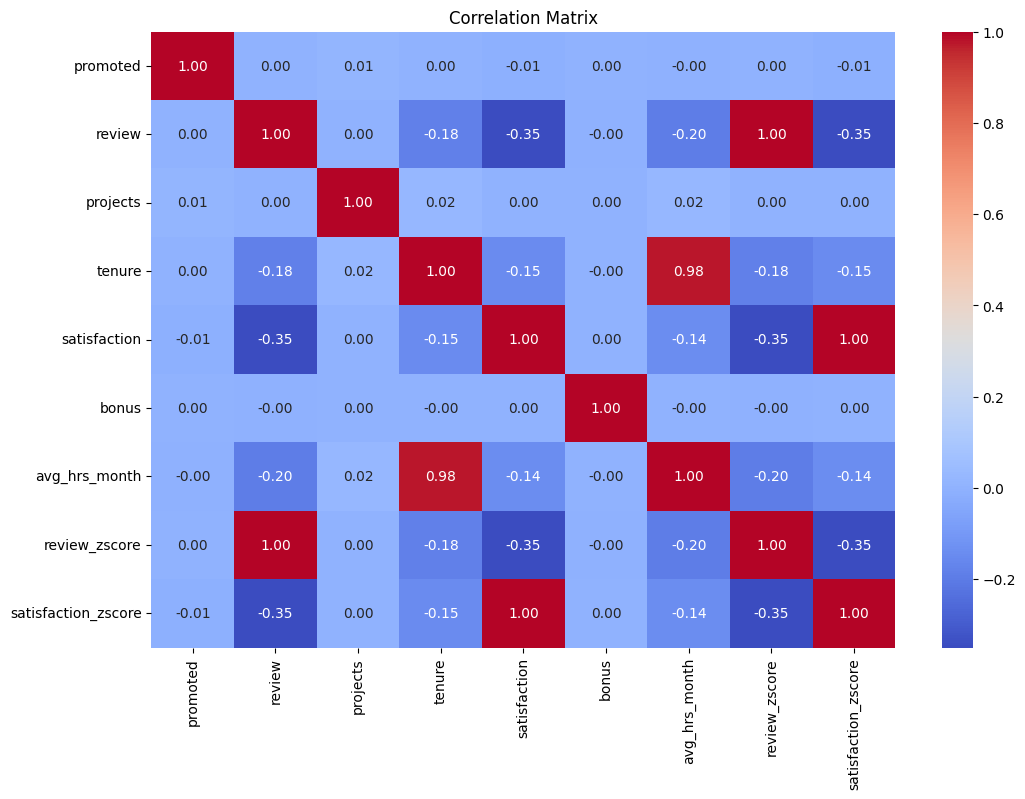

In [15]:
# Select only the numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Interpretation of the Correlation Matrix:

#### **Strong Positive Correlation:**
- **tenure** and **avg_hrs_month**: They have a very high correlation (~0.98), which means that employees with longer tenures tend to have worked more hours per month. This suggests a potential pattern where longer-serving employees work more hours.

#### **Moderate Negative Correlation:**
- **satisfaction** and **review**: The correlation coefficient is approximately -0.35, indicating that as satisfaction increases, the review score tends to decrease to some extent. This is an interesting relationship that might require further investigation.

#### **No Strong Correlation:**
- Variables like **promoted**, **projects**, and **bonus** show almost no correlation with most of the other variables. Their coefficients are close to 0, meaning they do not have a linear relationship with other variables in the dataset.

#### **Correlations with Z-Score Variables:**
- The **review_zscore** and **satisfaction_zscore** columns have identical correlations with their respective original variables (**review** and **satisfaction**). This is expected, as the Z-scores are just standardized versions of the original variables.

### **Insights from the Correlation Matrix:**

#### **Tenure and Hours Worked:**
- There is a very strong correlation between **tenure** and **average hours worked per month**. This suggests that longer-tenured employees are likely putting in more hours, which could be an important factor in understanding turnover.

#### **Satisfaction and Review:**
- The moderate negative correlation between **satisfaction** and **review** suggests that higher performance review scores might be linked to lower satisfaction. This is counterintuitive and might indicate that high-performing employees are under more stress or less satisfied, possibly due to workload or job demands.

#### **Other Weak Correlations:**
- Other variables such as **promotion** and **bonus** do not show strong correlations with the main variables. This suggests that they may not have as strong an impact on turnover compared to other factors like **satisfaction**, **tenure**, or **hours worked**.
n, tenure, or hours worked.
nure, or hours worked.


<hr style="border:0.5px solid black">

## Step 3: Data Preprocessing

### 3.1. Encode Categorical Variables

**Explanation:**
Here, we'll encode the categorical variables (such as **salary** and **department**), using Label Encoding. This will transform the categorical data into numerical form, which is necessary for model training.

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding for 'department' and 'salary'
df['department'] = label_encoder.fit_transform(df['department'])
df['salary'] = label_encoder.fit_transform(df['salary'])

# Rearrange the columns to move 'left' to the extreme right
cols = [col for col in df.columns if col != 'left'] + ['left']
df = df[cols]

# Now 'department' and 'salary' are encoded numerically and 'left' is moved to the right
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,review_zscore,satisfaction_zscore,outlier_score,left
0,6,0,0.577569,3,1,5.0,0.626759,0,180.866070,-0.870524,0.770211,1,no
1,6,0,0.751900,3,2,6.0,0.443679,0,182.708149,1.173161,-0.384527,1,no
2,9,0,0.722548,3,2,6.0,0.446823,0,184.416084,0.829076,-0.364695,1,no
3,4,0,0.675158,4,0,8.0,0.440139,0,188.707545,0.273521,-0.406856,1,no
4,8,0,0.676203,3,0,5.0,0.577607,1,179.821083,0.285770,0.460198,1,no


### 3.2. Train-Test Split

**Explanation:**
We'll split the dataset into **training** and **testing** sets to ensure that the model's performance can be evaluated on unseen data.

In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['left'])  # Assuming 'left' is the target variable
y = df['left']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(X_train.shape, X_test.shape)

(7632, 12) (1908, 12)


<hr style="border:0.5px solid black">

## Step 4: Model Building (Random Forest Classifier)

### 4.1. Train the Random Forest Model

**Explanation:**
Since we are retaining outliers, we’ll train a Random Forest Classifier, which is robust to outliers. This model will handle the non-linear relationships and potential outliers without needing much preprocessing.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

### 4.2. Evaluate Model Performance

**Explanation:**
We’ll evaluate the model using accuracy, precision, recall, and F1-score to ensure it’s performing well.

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8569182389937107

Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.93      0.90      1330
         yes       0.81      0.69      0.75       578

    accuracy                           0.86      1908
   macro avg       0.84      0.81      0.82      1908
weighted avg       0.85      0.86      0.85      1908


Confusion Matrix:
[[1235   95]
 [ 178  400]]


<hr style="border:0.5px solid black">

## Step 5: Feature Engineering

### 5.1. Feature Importance Analysis

**Explanation:**
We'll analyze which features contribute the most to the prediction of employee turnover. This is useful to understand which variables are most impactful in our model.

In [20]:
# Feature importance analysis
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

                Feature  Importance
8         avg_hrs_month    0.233324
6          satisfaction    0.164445
10  satisfaction_zscore    0.156269
9         review_zscore    0.144985
2                review    0.142170
5                tenure    0.070312
0            department    0.038976
3              projects    0.017021
4                salary    0.014372
7                 bonus    0.009668
11        outlier_score    0.005177
1              promoted    0.003282


### **Insights from the Feature Importance Analysis:**

Based on the feature importance output, we can focus on the top-performing features in the model and retrain it to improve efficiency and potentially increase accuracy. The most important features, based on our analysis, are:

- **avg_hrs_month**
- **satisfaction**
- **satisfaction_zscore**
- **review_zscore**
- **review**
- **tenure**

We will drop the features that contribute less to the prediction (e.g., **department**, **projects**, **salary**, **bonus**, **outlier_score**, and **promoted**) and retrain the model using only the most important features.


### 5.2. Define the New Feature Set

**Explanation:**
We will retrain the model using only the top features: **avg_hrs_month**, **satisfaction**, **satisfaction_zscore**, **review_zscore**, **review**, and **tenure**.

In [21]:
# Define the important features based on feature importance analysis
important_features = ['avg_hrs_month', 'satisfaction', 'satisfaction_zscore', 
                      'review_zscore', 'review', 'tenure']

# Create the new feature set (X) using only the important features
X_important = df[important_features]
y = df['left']  # Target remains the same

# Split the data (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Check the shape of the data
print(X_train.shape, X_test.shape)

(7632, 6) (1908, 6)


### 5.3. Model Building (Random Forest Classifier with Reduced Features)

**Explanation:**
We will retrain the Random Forest Classifier using only the important features.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model_reduced = RandomForestClassifier(random_state=42)

# Train the model with the reduced feature set
rf_model_reduced.fit(X_train, y_train)

# Make predictions on the test set
y_pred_reduced = rf_model_reduced.predict(X_test)

### 5.4.  Evaluate Model Performance

**Explanation:**
We will evaluate the model's performance using the same metrics: **accuracy**, **classification report**, and **confusion matrix**.

In [23]:
# Evaluate the model
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print("Accuracy with Important Features:", accuracy_reduced)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_reduced))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_reduced))

Accuracy with Important Features: 0.8563941299790356

Classification Report:
              precision    recall  f1-score   support

          no       0.88      0.92      0.90      1330
         yes       0.80      0.70      0.75       578

    accuracy                           0.86      1908
   macro avg       0.84      0.81      0.82      1908
weighted avg       0.85      0.86      0.85      1908


Confusion Matrix:
[[1227  103]
 [ 171  407]]


### 5.5.  Feature Importance Analysis for Reduced Feature Set

**Explanation:**
After retraining the model on the reduced features, we will check the feature importance again to ensure the model is relying on the most relevant features.

In [24]:
# Feature importance analysis for the reduced feature set
importances_reduced = rf_model_reduced.feature_importances_
feature_importance_df_reduced = pd.DataFrame({'Feature': X_important.columns, 'Importance': importances_reduced}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df_reduced)

               Feature  Importance
0        avg_hrs_month    0.260180
2  satisfaction_zscore    0.181533
1         satisfaction    0.165992
3        review_zscore    0.158576
4               review    0.156237
5               tenure    0.077482


### 5.6.  Model Optimization with Hyperparameter Tuning

**Explanation:**
We will optimize the **Random Forest Classifier** using **RandomizedSearchCV** to find the best combination of hyperparameters for the reduced feature set.

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define a reduced grid of hyperparameters for tuning (smaller parameter grid)
param_distributions = {
    'n_estimators': [100, 150, 200],  # Reduced range for number of trees
    'max_depth': [10, 20],            # Reduced range for max depth of the trees
    'min_samples_split': [2, 5],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],       # Minimum number of samples required at each leaf node
}

# Initialize RandomizedSearchCV with Random Forest, using fewer iterations and 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model_reduced,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings sampled (fewer iterations than GridSearch)
    cv=3,       # Reduce the number of cross-validation folds
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Perform randomized search on the training data
random_search.fit(X_train, y_train)

# Get the best parameters from the search
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator (optimized model)
best_rf_model = random_search.best_estimator_

# Make predictions with the optimized model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Optimized Model Accuracy:", accuracy_best)

# Classification report for the optimized model
print("\nOptimized Model Classification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix for the optimized model
print("\nOptimized Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Optimized Model Accuracy: 0.8616352201257862

Optimized Model Classification Report:
              precision    recall  f1-score   support

          no       0.88      0.93      0.90      1330
         yes       0.82      0.70      0.75       578

    accuracy                           0.86      1908
   macro avg       0.85      0.82      0.83      1908
weighted avg       0.86      0.86      0.86      1908


Optimized Model Confusion Matrix:
[[1238   92]
 [ 172  406]]


### Insights from the RandomizedSearchCV 
The RandomizedSearchCV approach has given us a well-optimized model with these parameters:


**Best Parameters:**
- **n_estimators**: 200
- **min_samples_split**: 5
- **min_samples_leaf**: 1
- **max_depth**: 10

With an optimized accuracy of **86.16%**, we can now proceed with the next steps. Based on the outputs, the **model's p**re**cision**, **recall, **f1-sco**re, and confusio**n matrix give us insights into its performance, particularly on the **"yes"** (employee left) class.

### Steps Moving Forward

#### **Key Takeaways from Model Performance:**
- **Optimized Model Accuracy**: 86.16%, which is good overall.

#### **Precision and Recall**:
- **Precision** for "yes" (employees who left) is 82% – meaning 82% of the predicted "yes" are correct.
- **Recall** for "yes" is 70% – meaning the model correctly identifies 70% of all employees who actually left.

#### **Confusion Matrix**:
- There are some false negatives (172 employees predicted to stay but actually left), which can be expected when prioritizing precision over recall.


<hr style="border:0.5px solid black">

## Step 6: Manual Input Prediction Function (Using Optimized Model)

### 6.1.  Define the Prediction Function

**Explanation:**
We will now define a function that will prompt you to enter the values manually before generating the prediction of the optimized model on whether an employee will leave based on the important features

In [26]:
# Function to predict employee turnover using manual input of the important features
def predict_employee_turnover_optimized():
    """
    Function to predict whether an employee will leave or stay based on user-inputted values 
    for the important features using the optimized Random Forest model.
    
    Returns:
    str: 'yes' if employee will leave, 'no' if employee will stay.
    """
    
    # Prompt the user to input values for the important features
    avg_hrs_month = float(input("Enter average hours worked per month: "))
    satisfaction = float(input("Enter satisfaction score (0-1): "))
    satisfaction_zscore = float(input("Enter satisfaction Z-score: "))
    review_zscore = float(input("Enter review Z-score: "))
    review = float(input("Enter review score: "))
    tenure = float(input("Enter tenure (number of years at the company): "))
    
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'avg_hrs_month': [avg_hrs_month],
        'satisfaction': [satisfaction],
        'satisfaction_zscore': [satisfaction_zscore],
        'review_zscore': [review_zscore],
        'review': [review],
        'tenure': [tenure]
    })
    
    # Predict whether the employee will leave or stay using the optimized model
    prediction = best_rf_model.predict(input_data)
    
    # Return 'yes' if employee will leave, otherwise 'no'
    return 'yes' if prediction[0] == 1 else 'no'

# Call the function to allow manual input and generate the prediction
result_optimized = predict_employee_turnover_optimized()

print("Will the employee leave?", result_optimized)

Enter average hours worked per month:  180.0
Enter satisfaction score (0-1):  0.6
Enter satisfaction Z-score:  0.3
Enter review Z-score:  0.7
Enter review score:  0.75
Enter tenure (number of years at the company):  5.0


Will the employee leave? no


<hr style="border:0.5px solid black">

## Step 7: Preparing the Model for Deployment

### 7.1.  Save the Optimized Model

**Explanation:**
To save the optimized model for future use, we can use the **pickle** library in Python. This will allow you to serialize the model and save it to a file. You can later load the model from the file and use it to make predictions without needing to retrain the model each time.Here’s how we save the **optimized Random Forest model** (best_rf_model) as a **.pkl** file

In [27]:
import pickle

# Save the optimized model to a file
with open('optimized_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

print("Optimized Random Forest model has been saved as 'optimized_rf_model.pkl'")

Optimized Random Forest model has been saved as 'optimized_rf_model.pkl'


### 7.2.  How to Load the Model Later

**Explanation:**
When you want to load the model in the future, you can use the following code:

In [28]:
# To load the model from the file
with open('optimized_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# You can now use `loaded_model` to make predictions

In [29]:
import pickle

# Load the model from the file
with open('optimized_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Optimized Random Forest model has been loaded from 'optimized_rf_model.pkl'")

# Example prediction using the loaded model
result_loaded_model = loaded_model.predict(pd.DataFrame({
    'avg_hrs_month': [180.0],
    'satisfaction': [0.6],
    'satisfaction_zscore': [-0.3],
    'review_zscore': [0.7],
    'review': [0.75],
    'tenure': [5.0]
}))

print("Prediction using the loaded model:", 'yes' if result_loaded_model[0] == 1 else 'no')

Optimized Random Forest model has been loaded from 'optimized_rf_model.pkl'
Prediction using the loaded model: no


<hr style="border:0.5px solid black">

## Step 8: Conclusion and Insights

In my analysis and modeling process, I’ve gained several valuable insights into employee turnover and successfully developed an optimized model for prediction.

### Correlation Analysis:
The correlation analysis revealed key relationships:
- **Tenure** and **avg_hrs_month** showed a strong positive correlation, indicating that employees who have been with the company longer tend to work more hours per month.
- **Satisfaction** and **review** exhibited a moderate negative correlation, suggesting that higher satisfaction may be associated with lower performance review scores, which could point to a potential work-life balance or performance pressure issue.
- **Promotion** and **bonus** had weak or no significant correlation with employee turnover, meaning they may not be primary drivers of employees leaving.

### Optimized Random Forest Classifier:
- **Model Selection**: I chose the Random Forest Classifier due to its robustness against outliers and its ability to handle non-linear relationships within the data. It performs well without the need for extensive data preprocessing, making it an ideal model for this scenario.
- **Model Optimization**: I fine-tuned the Random Forest model using RandomizedSearchCV, optimizing hyperparameters like the number of estimators, max depth, and minimum samples for splits and leaves. The optimized model achieved an accuracy of **86.16%**, with a strong balance between precision and recall for predicting employee turnover.
- **Feature Importance**: The most important features for predicting employee turnover were identified as:
  - **avg_hrs_month** (average hours worked per month)
  - **satisfaction** (overall satisfaction score)
  - **review** (performance review score)
  - **tenure** (years at the company)
  - Z-scores for both satisfaction and review, indicating the significance of standardized values in turnover prediction.

### Manual Input Function:
I created a manual input function that allows for real-time predictions by entering key employee attributes (e.g., hours worked, satisfaction, tenure). This feature can be used to simulate various scenarios or evaluate individual employee data, providing an easy way to test different employee conditions and predict whether they are likely to leave the company. The model can be deployed to evaluate entire employee datasets, and it also supports batch predictions for large-scale analysis.

### Model Deployment:
I finalized the model by saving it using the pickle library. This allows the model to be easily reloaded and used in future analyses without needing retraining. The model is now ready for deployment in real-world environments, where it can predict employee turnover based on input data, whether through manual input or batch processing.

### Key Insights:
- **Work Hours and Tenure**: Employees who work more hours and have been at the company longer are more likely to stay. However, extreme hours could still indicate potential burnout risks, which should be monitored.
- **Satisfaction vs. Review**: The inverse relationship between satisfaction and review scores suggests that high-performing employees may experience reduced satisfaction, possibly due to increased workload or pressure. This insight can help target retention efforts toward high performers who may be at risk of leaving due to dissatisfaction.

### Future Actions:
I recommend focusing on improving work-life balance and addressing dissatisfaction among high performers, while monitoring workload and ensuring long-tenured employees don’t face burnout.
mployees don’t face burnout.
mployees don’t face burnout.
 employees don’t face burnout.
 employees don’t face burnout.
 employees don’t face burnout.
 employees don’t face burnout.
ed employees don’t face burnout.
